web diaryの集計の総本山コード

In [2]:
import pandas as pd 
import datetime
df = pd.read_csv('/Users/takahiromatsunaga/res2023/PPcameraTG/PP/PP_webq/q_ans/diary.csv', encoding='shift-jis')

df_cleaned = df.copy()
df_cleaned['id'] = df_cleaned['id'].str.replace('jrs', '', regex=True) # .astype(int)
df_cleaned['id'] = df_cleaned['id'].apply(lambda x: f"23{x.zfill(3)}").astype(int)

# date列をdatetimeに書き換える
df_cleaned['day'] = df_cleaned['day'].str.extract(r'(\d{1,2}/\d{1,2})') # 正規表現で合致する部分を抽出
df_cleaned['day'] = pd.to_datetime(df_cleaned['day'], format='%m/%d').dt.strftime('%m/%d')

# indexをリセット
df_cleaned = df_cleaned.reset_index(drop=True)
print(df_cleaned)

         id    day         time    purpose              d            o  \
0     23026  12/19  10:00-11:00  仕事（勤務先以外）  渋谷駅前スクランブル交差点     渋谷マークシティ   
1     23020  12/21  13:00-14:00     乗り換えのみ            NaN          NaN   
2     23034  12/20  14:00-15:00         趣味  渋谷駅前スクランブル交差点  最初に訪れた場所と同じ   
3     23244  12/21  18:00-19:00         帰宅           特になし         特になし   
4     23120  12/19    6:00-7:00  仕事（勤務先以外）        通り過ぎただけ  そのまま会社まで歩いた   
...     ...    ...          ...        ...            ...          ...   
1574  23078  01/28  21:00-22:00         帰宅   渋谷スクランブルスクエア  最初に訪れた場所と同じ   
1575  23179  01/27  17:00-18:00     乗り換えのみ            NaN          NaN   
1576  23105  01/30    8:00-9:00     乗り換えのみ            NaN          NaN   
1577  23073  01/27  18:00-19:00         帰宅   渋谷スクランブルスクエア  最初に訪れた場所と同じ   
1578  23084  01/29  19:00-20:00     乗り換えのみ            NaN          NaN   

                d_line  d_car staire_to_gate                d_gate  \
0     山手線内回り（池袋→渋谷→大崎）    4.0            

In [3]:
import numpy as np
purpose_dict = {'仕事（勤務先）':1, '仕事（勤務先以外）':2,'通学':3,'帰宅':4,'買物':5,'食事':6,'習い事':7,'娯楽':8,'散策':9, '宿泊':10,'乗り換えのみ':11} 
d_dict = {'渋谷スクランブルスクエア':1,'渋谷ヒカリエ':2,'渋谷109':3,'渋谷フクラス':4,'渋谷マークシティ':5,'渋谷ストリーム':6,'渋谷駅前スクランブル交差点':7}
o_dict = {'渋谷スクランブルスクエア':1,'渋谷ヒカリエ':2,'渋谷109':3,'渋谷フクラス':4,'渋谷マークシティ':5,'渋谷ストリーム':6,'最初に訪れた場所と同じ':7}
line_dict = {'山手線内回り（池袋→渋谷→大崎）':1, '山手線外回り（大崎→渋谷→池袋）':2, 'JR湘南新宿ライン':3, 'JR埼京線':4, '東京メトロ副都心線':5, '東京メトロ銀座線':6, '東京メトロ半蔵門線':7, '東急東横線':8, '東急田園都市線':9, '京王井の頭線':10, 'バス':11, 'タクシー':12}
#gate_dict = {'1（南改札 東口）':1, '2（南改札 西口）':2, '3（ハチ公改札 宮益坂口）':3, '4（ハチ公改札 スクランブル交差点方面）':4, '5（ハチ公改札 ハチ公口）':5, '6（中央改札 東口）':6, '7（中央改札 京王井の頭線方面）':7, '8（中央改札 銀座線乗換）':8, '9（新南口）':9, '上記以外の出入り口を利用':10}
gate_dict = {'1（南改札 東口）':3, '2（南改札 西口）':3, '3（ハチ公改札 宮益坂口）':1, '4（ハチ公改札 スクランブル交差点方面）':1, '5（ハチ公改札 ハチ公口）':1, '6（中央改札 東口）':2, '7（中央改札 京王井の頭線方面）':2, '8（中央改札 銀座線乗換）':2, '9（新南口）':4, '上記以外の出入り口を利用':5}

df_cleaned['purpose'] = df_cleaned['purpose'].map(purpose_dict).fillna(0).astype(int)
df_cleaned['d'] = df_cleaned['d'].map(d_dict).fillna(0).astype(int)
df_cleaned['o'] = df_cleaned['o'].map(o_dict).fillna(0).astype(int)
df_cleaned['o_line'] = df_cleaned['o_line'].map(line_dict).fillna(0).astype(int)
df_cleaned['d_line'] = df_cleaned['d_line'].map(line_dict).fillna(0).astype(int)
df_cleaned['d_gate'] = df_cleaned['d_gate'].map(gate_dict).fillna(0).astype(int)
df_cleaned['o_gate'] = df_cleaned['o_gate'].map(gate_dict).fillna(0).astype(int)

# 7の場合，d_dictを参照させる
df_cleaned['o'] = df_cleaned.apply(lambda x: x['d'] if x['o'] == 7 else x['o'], axis=1)

# 確認
print(df_cleaned)

         id    day         time  purpose  d  o  d_line  d_car staire_to_gate  \
0     23026  12/19  10:00-11:00        2  7  5       1    4.0             12   
1     23020  12/21  13:00-14:00       11  0  0      10    NaN            NaN   
2     23034  12/20  14:00-15:00        0  7  7       1    3.0             12   
3     23244  12/21  18:00-19:00        4  0  0       1    4.0             12   
4     23120  12/19    6:00-7:00        2  0  0       1    1.0             12   
...     ...    ...          ...      ... .. ..     ...    ...            ...   
1574  23078  01/28  21:00-22:00        4  1  1       1    8.0              6   
1575  23179  01/27  17:00-18:00       11  0  0       1    8.0              7   
1576  23105  01/30    8:00-9:00       11  0  0       9    NaN            NaN   
1577  23073  01/27  18:00-19:00        4  1  1       4    3.0             15   
1578  23084  01/29  19:00-20:00       11  0  0       6    NaN            NaN   

      d_gate  o_line  o_gate staire_to_

降車位置に対してミクロNWでのノードidを紐づける

In [4]:
## 乗降位置で号車を決める．一旦降車方向のみを見る
# 満たしてないものを落としたいがどっちもnanでないものは少ないと思われるため
df_cleaned['dcar_node'] = 0
df_cleaned['ocar_node'] = 0

for i in range(len(df_cleaned)):
    if pd.isna(df_cleaned.loc[i, 'd_car']):
        continue
    o = int(df_cleaned.loc[i, 'd_car']) # 降車位置
    if '12/' in df_cleaned.loc[i, 'day']:
        if df_cleaned.loc[i, 'd_line'] == 1: # 内回り
            if o == 1:
                df_cleaned.loc[i, 'dcar_node'] = 15
            elif o == 2:
                df_cleaned.loc[i, 'dcar_node'] = 14
            elif o == 3:
                df_cleaned.loc[i, 'dcar_node'] = 13
            elif o == 4:
                df_cleaned.loc[i, 'dcar_node'] = 12
            elif o == 5:
                df_cleaned.loc[i, 'dcar_node'] = 11
            elif o == 6:
                df_cleaned.loc[i, 'dcar_node'] = 10
            elif o == 7 or o == 8:
                df_cleaned.loc[i, 'dcar_node'] = 9
            elif 9 <= o <= 11:
                df_cleaned.loc[i, 'dcar_node'] = 8
            else:
                df_cleaned.loc[i, 'dcar_node'] = 14 # どこにも載ってなければ14にしとく（適当）

        elif df_cleaned.loc[i, 'd_line'] == 2: # 外回り
            if o == 1 or o == 2:
                df_cleaned.loc[i, 'dcar_node'] = 23
            elif o == 3:
                df_cleaned.loc[i, 'dcar_node'] = 22
            elif o == 4 or o == 5:
                df_cleaned.loc[i, 'dcar_node'] = 21
            elif o == 6:
                df_cleaned.loc[i, 'dcar_node'] = 20
            elif o == 7:
                df_cleaned.loc[i, 'dcar_node'] = 19
            elif o == 8 or o == 9:
                df_cleaned.loc[i, 'dcar_node'] = 18
            elif o == 10:
                df_cleaned.loc[i, 'dcar_node'] = 17
            elif o == 11:
                df_cleaned.loc[i, 'dcar_node'] = 16
            else:
                df_cleaned.loc[i, 'dcar_node'] = 21 # どこにも載ってなければ14にしとく（適当）

        elif df_cleaned.loc[i, 'd_line'] == 3: # 湘南新宿
            if o == 15:
                df_cleaned.loc[i, 'dcar_node'] = 7
            elif o == 14:
                df_cleaned.loc[i, 'dcar_node'] = 6
            elif o == 13:
                df_cleaned.loc[i, 'dcar_node'] = 5
            elif o == 12:
                df_cleaned.loc[i, 'dcar_node'] = 4
            elif o == 10 or o == 11:
                df_cleaned.loc[i, 'dcar_node'] = 3
            elif o == 9:
                df_cleaned.loc[i, 'dcar_node'] = 2
            elif o <= 8:
                df_cleaned.loc[i, 'dcar_node'] = 1
            else:
                df_cleaned.loc[i, 'dcar_node'] = 4 # どこにも載ってなければ4にしとく（適当）

        elif df_cleaned.loc[i, 'd_line'] == 4: # 埼京
            if o == 1:
                df_cleaned.loc[i, 'dcar_node'] = 5
            elif o == 2:
                df_cleaned.loc[i, 'dcar_node'] = 4
            elif o == 3:
                df_cleaned.loc[i, 'dcar_node'] = 3
            elif o == 4:
                df_cleaned.loc[i, 'dcar_node'] = 2
            elif o >= 5:
                df_cleaned.loc[i, 'dcar_node'] = 1
            else:
                df_cleaned.loc[i, 'dcar_node'] = 3 # どこにも載ってなければ3にしとく（適当）

        else:
            continue # 他の路線だと改札関係ないので削除

    else: # 工事後なのでホーム変わってる
        if df_cleaned.loc[i, 'd_line'] == 1 or df_cleaned.loc[i, 'd_line'] == 2: # 山手
            if o == 1:
                df_cleaned.loc[i, 'dcar_node'] = 15
            elif o == 2:
                df_cleaned.loc[i, 'dcar_node'] = 14
            elif o == 3:
                df_cleaned.loc[i, 'dcar_node'] = 13
            elif o == 4:
                df_cleaned.loc[i, 'dcar_node'] = 12
            elif o == 5:
                df_cleaned.loc[i, 'dcar_node'] = 11
            elif o == 6:
                df_cleaned.loc[i, 'dcar_node'] = 10
            elif o == 7 or o == 8:
                df_cleaned.loc[i, 'dcar_node'] = 9
            elif 9 <= o <= 11:
                df_cleaned.loc[i, 'dcar_node'] = 8
            else:
                df_cleaned.loc[i, 'dcar_node'] = 14 # どこにも載ってなければ14にしとく（適当）

        # 湘南・埼京は条件同じ
        elif df_cleaned.loc[i, 'd_line'] == 3: # 湘南新宿
            if o == 15:
                df_cleaned.loc[i, 'dcar_node'] = 7
            elif o == 14:
                df_cleaned.loc[i, 'dcar_node'] = 6
            elif o == 13:
                df_cleaned.loc[i, 'dcar_node'] = 5
            elif o == 12:
                df_cleaned.loc[i, 'dcar_node'] = 4
            elif o == 10 or o == 11:
                df_cleaned.loc[i, 'dcar_node'] = 3
            elif o == 9:
                df_cleaned.loc[i, 'dcar_node'] = 2
            elif o <= 8:
                df_cleaned.loc[i, 'dcar_node'] = 1
            else:
                df_cleaned.loc[i, 'dcar_node'] = 4 # どこにも載ってなければ4にしとく（適当）

        elif df_cleaned.loc[i, 'd_line'] == 4: # 埼京
            if o == 1:
                df_cleaned.loc[i, 'dcar_node'] = 5
            elif o == 2:
                df_cleaned.loc[i, 'dcar_node'] = 4
            elif o == 3:
                df_cleaned.loc[i, 'dcar_node'] = 3
            elif o == 4:
                df_cleaned.loc[i, 'dcar_node'] = 2
            elif o >= 5:
                df_cleaned.loc[i, 'dcar_node'] = 1
            else:
                df_cleaned.loc[i, 'dcar_node'] = 3 # どこにも載ってなければ3にしとく（適当）

        else:
            continue # 他の路線だと改札関係ないので削除

### 続いて乗車時についても同様に処理

df_cleaned.reset_index(drop=True, inplace=True)
print(df_cleaned)
# indexをリセットする

         id    day         time  purpose  d  o  d_line  d_car staire_to_gate  \
0     23026  12/19  10:00-11:00        2  7  5       1    4.0             12   
1     23020  12/21  13:00-14:00       11  0  0      10    NaN            NaN   
2     23034  12/20  14:00-15:00        0  7  7       1    3.0             12   
3     23244  12/21  18:00-19:00        4  0  0       1    4.0             12   
4     23120  12/19    6:00-7:00        2  0  0       1    1.0             12   
...     ...    ...          ...      ... .. ..     ...    ...            ...   
1574  23078  01/28  21:00-22:00        4  1  1       1    8.0              6   
1575  23179  01/27  17:00-18:00       11  0  0       1    8.0              7   
1576  23105  01/30    8:00-9:00       11  0  0       9    NaN            NaN   
1577  23073  01/27  18:00-19:00        4  1  1       4    3.0             15   
1578  23084  01/29  19:00-20:00       11  0  0       6    NaN            NaN   

      d_gate  o_line  o_gate staire_to_

In [5]:
for i in range(len(df_cleaned)):
    if pd.isna(df_cleaned.loc[i, 'o_car']):
        continue

    o = int(df_cleaned.loc[i, 'o_car']) # 乗車位置
    if '12/' in df_cleaned.loc[i, 'day']:
        if df_cleaned.loc[i, 'o_line'] == 1: # 内回り
            if o == 1:
                df_cleaned.loc[i, 'ocar_node'] = 15
            elif o == 2:
                df_cleaned.loc[i, 'ocar_node'] = 14
            elif o == 3:
                df_cleaned.loc[i, 'ocar_node'] = 13
            elif o == 4:
                df_cleaned.loc[i, 'ocar_node'] = 12
            elif o == 5:
                df_cleaned.loc[i, 'ocar_node'] = 11
            elif o == 6:
                df_cleaned.loc[i, 'ocar_node'] = 10
            elif o == 7 or o == 8:
                df_cleaned.loc[i, 'ocar_node'] = 9
            elif 9 <= o <= 11:
                df_cleaned.loc[i, 'ocar_node'] = 8
            else:
                df_cleaned.loc[i, 'ocar_node'] = 14 # どこにも載ってなければ14にしとく（適当）

        elif df_cleaned.loc[i, 'o_line'] == 2: # 外回り
            if o == 1 or o == 2:
                df_cleaned.loc[i, 'ocar_node'] = 23
            elif o == 3:
                df_cleaned.loc[i, 'ocar_node'] = 22
            elif o == 4 or o == 5:
                df_cleaned.loc[i, 'ocar_node'] = 21
            elif o == 6:
                df_cleaned.loc[i, 'ocar_node'] = 20
            elif o == 7:
                df_cleaned.loc[i, 'ocar_node'] = 19
            elif o == 8 or o == 9:
                df_cleaned.loc[i, 'ocar_node'] = 18
            elif o == 10:
                df_cleaned.loc[i, 'ocar_node'] = 17
            elif o == 11:
                df_cleaned.loc[i, 'ocar_node'] = 16
            else:
                df_cleaned.loc[i, 'ocar_node'] = 21 # どこにも載ってなければ14にしとく（適当）

        elif df_cleaned.loc[i, 'o_line'] == 3: # 湘南新宿
            if o == 15:
                df_cleaned.loc[i, 'ocar_node'] = 7
            elif o == 14:
                df_cleaned.loc[i, 'ocar_node'] = 6
            elif o == 13:
                df_cleaned.loc[i, 'ocar_node'] = 5
            elif o == 12:
                df_cleaned.loc[i, 'ocar_node'] = 4
            elif o == 10 or o == 11:
                df_cleaned.loc[i, 'ocar_node'] = 3
            elif o == 9:
                df_cleaned.loc[i, 'ocar_node'] = 2
            elif o <= 8:
                df_cleaned.loc[i, 'ocar_node'] = 1
            else:
                df_cleaned.loc[i, 'ocar_node'] = 4 # どこにも載ってなければ4にしとく（適当）

        elif df_cleaned.loc[i, 'o_line'] == 4: # 埼京
            if o == 1:
                df_cleaned.loc[i, 'ocar_node'] = 5
            elif o == 2:
                df_cleaned.loc[i, 'ocar_node'] = 4
            elif o == 3:
                df_cleaned.loc[i, 'ocar_node'] = 3
            elif o == 4:
                df_cleaned.loc[i, 'ocar_node'] = 2
            elif o >= 5:
                df_cleaned.loc[i, 'ocar_node'] = 1
            else:
                df_cleaned.loc[i, 'ocar_node'] = 3 # どこにも載ってなければ3にしとく（適当）

        else:
            continue # 他の路線だと改札関係ないので削除

    else: # 工事後なのでホーム変わってる
        if df_cleaned.loc[i, 'o_line'] == 1 or df_cleaned.loc[i, 'o_line'] == 2: # 山手
            if o == 1:
                df_cleaned.loc[i, 'ocar_node'] = 15
            elif o == 2:
                df_cleaned.loc[i, 'ocar_node'] = 14
            elif o == 3:
                df_cleaned.loc[i, 'ocar_node'] = 13
            elif o == 4:
                df_cleaned.loc[i, 'ocar_node'] = 12
            elif o == 5:
                df_cleaned.loc[i, 'ocar_node'] = 11
            elif o == 6:
                df_cleaned.loc[i, 'ocar_node'] = 10
            elif o == 7 or o == 8:
                df_cleaned.loc[i, 'ocar_node'] = 9
            elif 9 <= o <= 11:
                df_cleaned.loc[i, 'ocar_node'] = 8
            else:
                df_cleaned.loc[i, 'ocar_node'] = 14 # どこにも載ってなければ14にしとく（適当）

        # 湘南・埼京は条件同じ
        elif df_cleaned.loc[i, 'o_line'] == 3: # 湘南新宿
            if o == 15:
                df_cleaned.loc[i, 'ocar_node'] = 7
            elif o == 14:
                df_cleaned.loc[i, 'ocar_node'] = 6
            elif o == 13:
                df_cleaned.loc[i, 'ocar_node'] = 5
            elif o == 12:
                df_cleaned.loc[i, 'ocar_node'] = 4
            elif o == 10 or o == 11:
                df_cleaned.loc[i, 'ocar_node'] = 3
            elif o == 9:
                df_cleaned.loc[i, 'ocar_node'] = 2
            elif o <= 8:
                df_cleaned.loc[i, 'ocar_node'] = 1
            else:
                df_cleaned.loc[i, 'ocar_node'] = 4 # どこにも載ってなければ4にしとく（適当）

        elif df_cleaned.loc[i, 'o_line'] == 4: # 埼京
            if o == 1:
                df_cleaned.loc[i, 'ocar_node'] = 5
            elif o == 2:
                df_cleaned.loc[i, 'ocar_node'] = 4
            elif o == 3:
                df_cleaned.loc[i, 'ocar_node'] = 3
            elif o == 4:
                df_cleaned.loc[i, 'ocar_node'] = 2
            elif o >= 5:
                df_cleaned.loc[i, 'ocar_node'] = 1
            else:
                df_cleaned.loc[i, 'ocar_node'] = 3 # どこにも載ってなければ3にしとく（適当）

        else:
            continue # 他の路線だと改札関係ないので削除


目的地dの位置情報を付与したdiaryデータとの紐付け（白井さん）
及び出発地oの位置情報も新たに付与しないといけない

In [9]:
# 読み込み
df_d_loc = pd.read_csv('/Users/takahiromatsunaga/res2023/PPcameraTG/PP/PP_webq/gate_MNL/filtered_shibu_d_loc.csv')
df_o_loc = pd.read_csv('/Users/takahiromatsunaga/res2023/PPcameraTG/PP/PP_webq/gate_MNL/filtered_shibu_o_loc.csv')

In [10]:
df_cleaned2 = df_cleaned.copy()
# 入れ物作る
df_cleaned2['d_lat'] = 0
df_cleaned2['d_lon'] = 0

df_cleaned2['o_lat'] = 0
df_cleaned2['o_lon'] = 0

# df_d_loc/df_o_locの日付形式をMM/DDに変換
def is_valid_date(date_str):
    try:
        pd.to_datetime(date_str)
        return True
    except ValueError:
        return False
valid_dates = df_d_loc['day'].apply(is_valid_date)
df_d_loc.loc[valid_dates, 'day'] = pd.to_datetime(df_d_loc.loc[valid_dates, 'day']).dt.strftime('%m/%d')
valid_dates = df_o_loc['day'].apply(is_valid_date)
df_o_loc.loc[valid_dates, 'day'] = pd.to_datetime(df_o_loc.loc[valid_dates, 'day']).dt.strftime('%m/%d')

# df_d_loc/df_o_locいづれかに入ってれば採用して，d_lonlat, o_lonlatが0か否かで処理を判別する
for i in range(len(df_d_loc)):
    userid = df_d_loc.loc[i, 'id']
    day = df_d_loc.loc[i, 'day']

    # df_cleaned2['id']とdf_cleaned2['day']が一致するか否かで場合分け
    match = df_cleaned2[(df_cleaned2['id'] == userid) & (df_cleaned2['day'] == day)]
    if not match.empty:
        df_cleaned2.loc[match.index, 'd_lat'] = df_d_loc.loc[i, 'lat']  # 緯度を入れる
        df_cleaned2.loc[match.index, 'd_lon'] = df_d_loc.loc[i, 'lon']  # 経度を入れる

for i in range(len(df_o_loc)):
    userid = df_o_loc.loc[i, 'id']
    day = df_o_loc.loc[i, 'day']

    # df_cleaned2['id']とdf_cleaned2['day']が一致するか否かで場合分け
    match = df_cleaned2[(df_cleaned2['id'] == userid) & (df_cleaned2['day'] == day)]
    if not match.empty:
        df_cleaned2.loc[match.index, 'o_lat'] = df_o_loc.loc[i, 'lat']  # 緯度を入れる
        df_cleaned2.loc[match.index, 'o_lon'] = df_o_loc.loc[i, 'lon']  # 経度を入れる

df_cleaned2.to_csv('/Users/takahiromatsunaga/res2023/PPcameraTG/PP/PP_webq/q_ans/diary_cleaned_odcar_odlatlon.csv')


改札ポイントデータの導入

In [11]:
import pandas as pd
df_point = pd.read_csv('/Users/takahiromatsunaga/res2023/PPcameraTG/PP/PP_webq/gate_MNL/point_kai.csv')

In [12]:
df_cleaned2 = pd.read_csv('/Users/takahiromatsunaga/res2023/PPcameraTG/PP/PP_webq/q_ans/diary_cleaned_odcar_odlatlon.csv')

In [13]:
print(df_cleaned2)

      Unnamed: 0     id    day         time  purpose  d  o  d_line  d_car  \
0              0  23026  12/19  10:00-11:00        2  7  5       1    4.0   
1              1  23020  12/21  13:00-14:00       11  0  0      10    NaN   
2              2  23034  12/20  14:00-15:00        0  7  7       1    3.0   
3              3  23244  12/21  18:00-19:00        4  0  0       1    4.0   
4              4  23120  12/19    6:00-7:00        2  0  0       1    1.0   
...          ...    ...    ...          ...      ... .. ..     ...    ...   
1574        1574  23078  01/28  21:00-22:00        4  1  1       1    8.0   
1575        1575  23179  01/27  17:00-18:00       11  0  0       1    8.0   
1576        1576  23105  01/30    8:00-9:00       11  0  0       9    NaN   
1577        1577  23073  01/27  18:00-19:00        4  1  1       4    3.0   
1578        1578  23084  01/29  19:00-20:00       11  0  0       6    NaN   

     staire_to_gate  ...  o_line  o_gate  staire_to_home o_car  dcar_node  

dirayデータにどの改札に何ポイント与えられたかをくっつける

In [14]:
df_point['id'] = df_point['id'].str.replace('jrs', '', regex=True) # .astype(int)
# df_cleaned['id'] = df_cleaned['id'].apply(lambda x: int(f"23{x}"))
df_point['id'] = df_point['id'].apply(lambda x: f"23{x.zfill(3)}").astype(int)

df_cleaned3 = df_cleaned2.copy()
df_cleaned3['point_gate'] = 0
df_cleaned3['point_amount'] = 0

# df_pointの日付形式をMM/DDに変換
def is_valid_date(date_str):
    try:
        pd.to_datetime(date_str)
        return True
    except ValueError:
        return False
valid_dates = df_point['day'].apply(is_valid_date)
df_point.loc[valid_dates, 'day'] = pd.to_datetime(df_point.loc[valid_dates, 'day']).dt.strftime('%m/%d')

a = 0
for i in range(len(df_point)):
    userid = df_point.loc[i, 'id']
    day = df_point.loc[i, 'day']
    category = df_point.loc[i, 'point_category']
    if category == 1:

        gate = df_point.loc[i, 'point_action']
        
        if gate == 'ハチ公改札':
            a = 1
        elif gate == '中央改札':
            a = 2
        elif gate == '南口改札':
            a = 3

        # df_cleaned2['id']とdf_cleaned2['day']が一致するか否かで場合分け
        match = df_cleaned3[(df_cleaned3['id'] == userid) & (df_cleaned3['day'] == day)]
        if not match.empty:
            df_cleaned3.loc[match.index, 'point_gate'] = a #df_d_loc.loc[i, 'lat']  # 緯度を入れる
            df_cleaned3.loc[match.index, 'point_amount'] = df_point.loc[i, 'point_amount']  # 経度を入れる
    
    else:
        continue


print(df_point)

     Unnamed: 0     id  point_category point_action point_limit  point_amount  \
0             0  23038             1.0         南口改札         当日中          60.0   
1             1  23040             2.0          7時台    2/5（日）まで          60.0   
2             2  23062             1.0         南口改札   1/30（月）まで          20.0   
3             3  23080             2.0          7時台   1/30（月）まで          40.0   
4             4  23084             1.0        ハチ公改札    2/5（日）まで          60.0   
..          ...    ...             ...          ...         ...           ...   
913        1455  23221             2.0         11時台         当日中          60.0   
914        1456  23044             1.0         中央改札         当日中          40.0   
915        1457  23111             1.0         南口改札    2/5（日）まで          40.0   
916        1458  23155             1.0         南口改札         当日中          60.0   
917        1459  23166             1.0        ハチ公改札         当日中          20.0   

       day  
0    01/24  
1

ポイントつけた最終盤をcsv出力

In [15]:
df_cleaned3.to_csv('/Users/takahiromatsunaga/res2023/PPcameraTG/PP/PP_webq/q_ans/diary_cleaned_odcar_odlatlon_point.csv')

クロス集計パート

<Figure size 720x432 with 0 Axes>

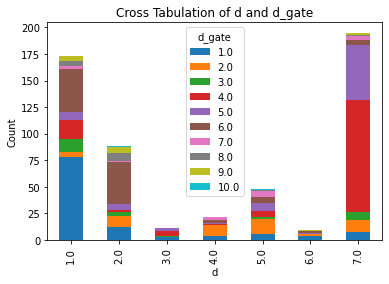

In [4]:
## クロス集計
import matplotlib.pyplot as plt

df_diary = pd.read_csv('/Users/takahiromatsunaga/res2023/PPcameraTG/PP/PP_webq/q_ans/diary_cleaned.csv')

# dとd_gateのクロス集計
cross_tab = pd.crosstab(df_cleaned['d'], df_cleaned['d_gate'])

# どっちかがNaNのものはカウントしない
df_filtered = df_cleaned.dropna(subset=['d', 'd_gate'])
cross_tab_filtered = pd.crosstab(df_filtered['d'], df_filtered['d_gate'])

# グラフの描画
plt.figure(figsize=(10, 6))
cross_tab_filtered.plot(kind='bar', stacked=True)
plt.title('Cross Tabulation of d and d_gate')
plt.xlabel('d')
plt.ylabel('Count')
plt.legend(title='d_gate')
plt.show()

<Figure size 720x432 with 0 Axes>

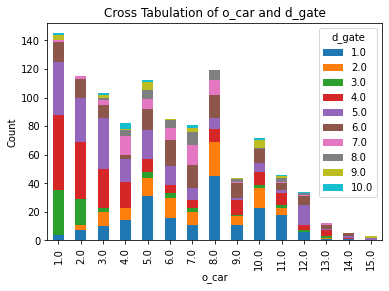

In [5]:
# dとd_gateのクロス集計
cross_tab = pd.crosstab(df_cleaned['o_car'], df_cleaned['d_gate'])

# どっちかがNaNのものはカウントしない
df_filtered = df_cleaned.dropna(subset=['o_car', 'd_gate'])
cross_tab_filtered = pd.crosstab(df_filtered['o_car'], df_filtered['d_gate'])

# グラフの描画
plt.figure(figsize=(10, 6))
cross_tab_filtered.plot(kind='bar', stacked=True)
plt.title('Cross Tabulation of o_car and d_gate')
plt.xlabel('o_car')
plt.ylabel('Count')
plt.legend(title='d_gate')
plt.show()

<Figure size 720x432 with 0 Axes>

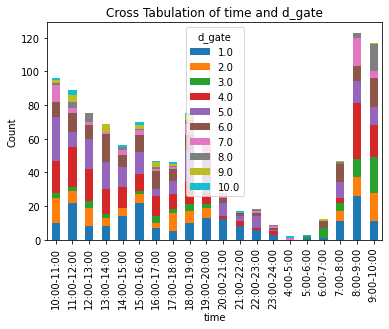

In [6]:
# dとd_gateのクロス集計
cross_tab = pd.crosstab(df_cleaned['time'], df_cleaned['d_gate'])

# どっちかがNaNのものはカウントしない
df_filtered = df_cleaned.dropna(subset=['time', 'd_gate'])
cross_tab_filtered = pd.crosstab(df_filtered['time'], df_filtered['d_gate'])

# グラフの描画
plt.figure(figsize=(10, 6))
cross_tab_filtered.plot(kind='bar', stacked=True)
plt.title('Cross Tabulation of time and d_gate')
plt.xlabel('time')
plt.ylabel('Count')
plt.legend(title='d_gate')
plt.show()

<Figure size 720x432 with 0 Axes>

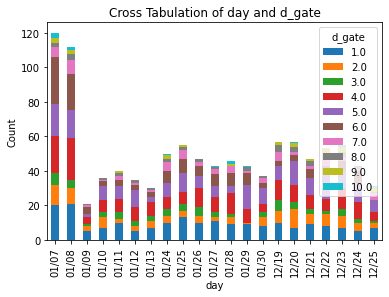

In [7]:
# dとd_gateのクロス集計
cross_tab = pd.crosstab(df_cleaned['day'], df_cleaned['d_gate'])

# どっちかがNaNのものはカウントしない
df_filtered = df_cleaned.dropna(subset=['day', 'd_gate'])
cross_tab_filtered = pd.crosstab(df_filtered['day'], df_filtered['d_gate'])

# グラフの描画
plt.figure(figsize=(10, 6))
cross_tab_filtered.plot(kind='bar', stacked=True)
plt.title('Cross Tabulation of day and d_gate')
plt.xlabel('day')
plt.ylabel('Count')
plt.legend(title='d_gate')
plt.show()

<Figure size 720x432 with 0 Axes>

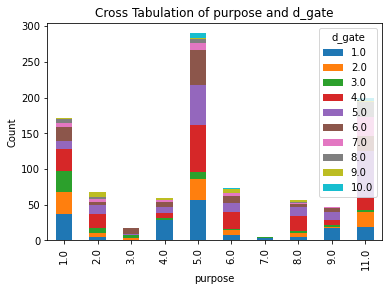

In [8]:
# dとd_gateのクロス集計
cross_tab = pd.crosstab(df_cleaned['purpose'], df_cleaned['d_gate'])

# どっちかがNaNのものはカウントしない
df_filtered = df_cleaned.dropna(subset=['purpose', 'd_gate'])
cross_tab_filtered = pd.crosstab(df_filtered['purpose'], df_filtered['d_gate'])

# グラフの描画
plt.figure(figsize=(10, 6))
cross_tab_filtered.plot(kind='bar', stacked=True)
plt.title('Cross Tabulation of purpose and d_gate')
plt.xlabel('purpose')
plt.ylabel('Count')
plt.legend(title='d_gate')
plt.show()

<Figure size 720x432 with 0 Axes>

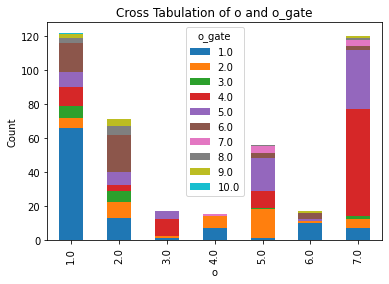

In [9]:
# dとd_gateのクロス集計
cross_tab = pd.crosstab(df_cleaned['o'], df_cleaned['o_gate'])

# どっちかがNaNのものはカウントしない
df_filtered = df_cleaned.dropna(subset=['o', 'o_gate'])
cross_tab_filtered = pd.crosstab(df_filtered['o'], df_filtered['o_gate'])

# グラフの描画
plt.figure(figsize=(10, 6))
cross_tab_filtered.plot(kind='bar', stacked=True)
plt.title('Cross Tabulation of o and o_gate')
plt.xlabel('o')
plt.ylabel('Count')
plt.legend(title='o_gate')
plt.show()

<Figure size 720x432 with 0 Axes>

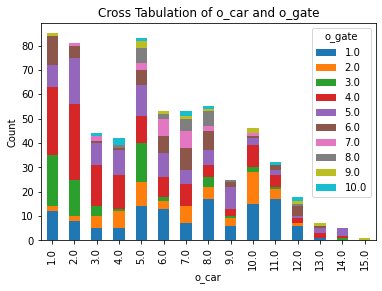

In [10]:
# dとd_gateのクロス集計
cross_tab = pd.crosstab(df_cleaned['o_car'], df_cleaned['o_gate'])

# どっちかがNaNのものはカウントしない
df_filtered = df_cleaned.dropna(subset=['o_car', 'o_gate'])
cross_tab_filtered = pd.crosstab(df_filtered['o_car'], df_filtered['o_gate'])

# グラフの描画
plt.figure(figsize=(10, 6))
cross_tab_filtered.plot(kind='bar', stacked=True)
plt.title('Cross Tabulation of o_car and o_gate')
plt.xlabel('o_car')
plt.ylabel('Count')
plt.legend(title='o_gate')
plt.show()